<h1>Bank Marketing Dataset (bank-additional-full)</h1>

<b>Topic</b>: Direct marketing campaigns of a bank to make clients subscribe a bank term deposit.<br>

DATASET: bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math 
import time
import seaborn as sns
import datetime

from sklearn import preprocessing
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_scores
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [2]:
bankdf = pd.read_csv("datasets/bank-additional-full.csv", sep=";")
bankdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<h1>FEATURE ENGINEERING</h1>

- Year: does it make sense to derive a year column to complete the date? Can be derived knowing that data are ordered. 
- Education: just one big basic class instead of all years?
- Duration: in minutes instead of seconds?


In [3]:
# CREATION OF YEAR VARIABLE

nemployed = bankdf['nr.employed']

unique, index = np.unique(nemployed, return_index=True) # [5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5, 5008.7, 4991.6, 4963.6]

# 2008: 5191. , 5228.1, 5195.8
# 2009: 5176.3, 5099.1, 5076.2, 5017.5
# 2010: 5023.5, 5008.7, 4991.6, 4963.6

year_df = {'year':['2008','2008','2008','2009','2009','2009','2009','2010','2010','2010','2010'], 
           'nr.employed':[5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5, 5008.7, 4991.6, 4963.6]}
year_df = pd.DataFrame.from_dict(year_df)

bankdf = bankdf.merge(year_df, on='nr.employed', how='left')

In [4]:
# Creating a function to convert the month abbrevuation in number

bankdf["month_name"] = bankdf["month"]

def convert_month(df):
    df['month'] = [int(datetime.datetime.strptime(obv, '%b').month) for obv in df['month_name']]
    df['year'] = [int(obv) for obv in df['year']]
convert_month(bankdf)




<h1>DESCRIPTION OF DATASET, CORRELATION MATRIX, PAIRPLOT and DESCRIPTION OF CATEGORICAL VARS</h1>

1) Describe() is used to provide descriptive statistics of the numerical variables in the dataset<br>
2) Correlation Heatmap: correlation of the numerical variables. Orange means positive correlation, Blue means negative correlation.<br>
3) PairPLot: scatterplots of the pairs of numerical variables, in the diagonal there is a KDE.<br>
4) Categorical Variables Description

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

In [5]:
#bankdf.info() # 41188  rows × 21 columns, 20 features and 1 target variable
bankdf.describe()  # statistics of numerical data

,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,year
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,6.607896,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,2008.382102
std,10.42125,2.040998,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.586849
min,17.00000,3.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,2008.000000
25%,32.00000,5.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,2008.000000
50%,38.00000,6.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,2008.000000
75%,47.00000,8.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,2009.000000
max,98.00000,12.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,2010.000000


In [6]:
# Description of Categorical Variables
bankdf.describe(include=['object']) # categorical variables

,job,marital,education,default,housing,loan,contact,day_of_week,poutcome,y,month_name
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,5,3,2,10
top,admin.,married,university.degree,no,yes,no,cellular,thu,nonexistent,no,may
freq,10422,24928,12168,32588,21576,33950,26144,8623,35563,36548,13769


Text(0.5, 1.0, 'Correlation Heatmap')

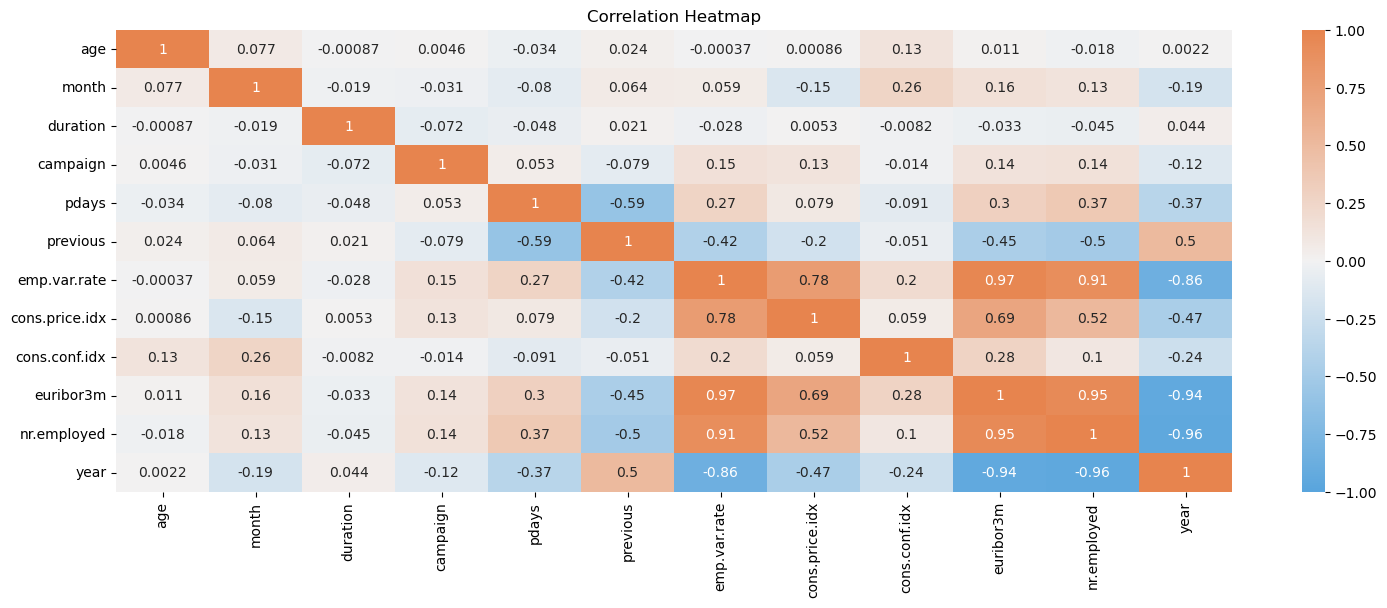

In [7]:
plt.figure(figsize=(18, 6))

pal2 = sns.diverging_palette(240, 30, l=65, as_cmap=True)

heatmap = sns.heatmap(bankdf.corr(), vmin=-1, vmax=1, annot=True,cmap=pal2)
heatmap.set_title('Correlation Heatmap')

In [8]:
# ATTENTION TO THIS!!! TAKES A LOT OF TIME!!!

# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

sns.pairplot(bankdf, hue="y", diag_kind = 'kde')

<h1>VISUALIZATION: Numerical variables</h1>

<Axes: xlabel='Date'>

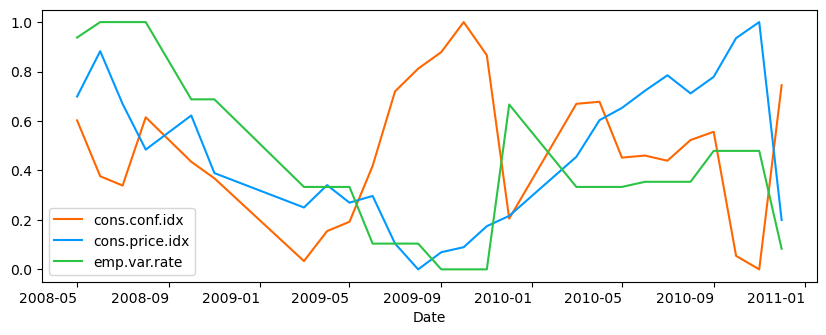

In [7]:
# FLUCTUATIONS OF 3 ECONOMIC FEATURES; STANDARDIZED
pal = [ "#ff6600", "#0099ff", "#2BC344"]
sns.set_palette(pal)

bankdf["day"] = int(1)
bankdf['date']=pd.to_datetime(bankdf[['year','month','day']])

scaler = preprocessing.MinMaxScaler()
dfp = pd.pivot_table(data=bankdf, index='date', values=["cons.price.idx", "emp.var.rate","cons.conf.idx"], 
                     aggfunc='first')

dfp[:] = scaler.fit_transform(dfp)

dfp.plot(figsize=(10, 4), ylabel='', xlabel='Date', rot=0) #with standardized data. looking at fluctuations over time



<Axes: xlabel='age', ylabel='Density'>

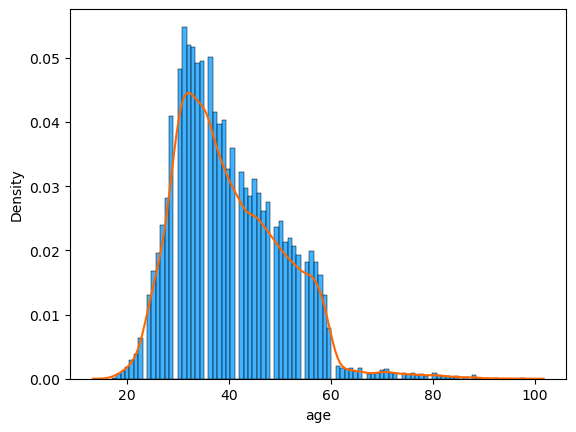

In [10]:
# Age

ax = sns.histplot(data=bankdf, x="age", kde=False, stat='density', color="#0099ff")
sns.kdeplot(data=bankdf, x="age", color="#ff6600", ax=ax)

<Axes: xlabel='duration', ylabel='Density'>

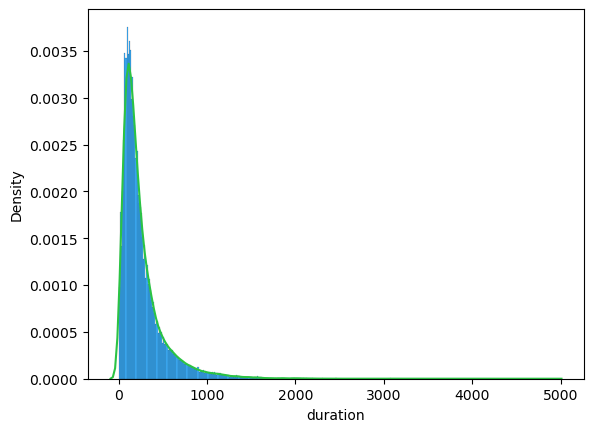

In [11]:
# Duration

ax = sns.histplot(bankdf["duration"], kde=False, stat='density', color="#0099ff")
sns.kdeplot(bankdf["duration"], color="#2BC344", ax=ax)

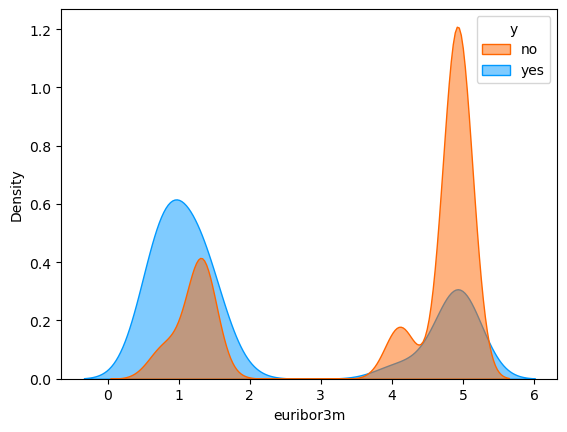

In [12]:
# Density plot with euribor3m and y outcome. Interesting.


sns.kdeplot(data=bankdf, x="euribor3m", hue="y", fill=True, common_norm=False, alpha=.5)
plt.show()

C:\Users\alida\AppData\Local\Temp\ipykernel_15652\8030790.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.kdeplot(data=bankdf, x="duration", hue="y", fill=True, common_norm=False, palette=pal, alpha = 0.5)


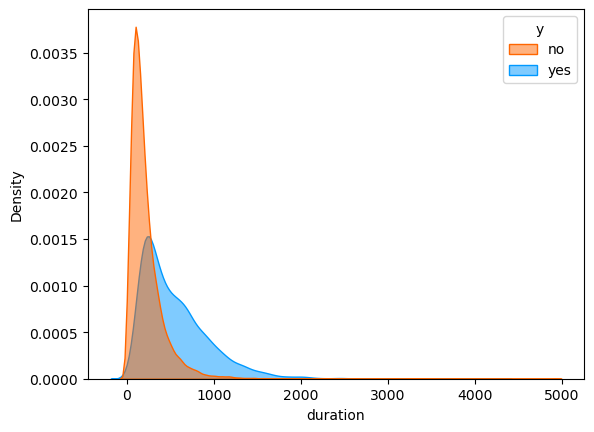

In [13]:
# VISUALIZATION: y and DURATION

sns.kdeplot(data=bankdf, x="duration", hue="y", fill=True, common_norm=False, palette=pal, alpha = 0.5)
plt.show()

<h1>VISUALIZATION: Categorical variables</h1>

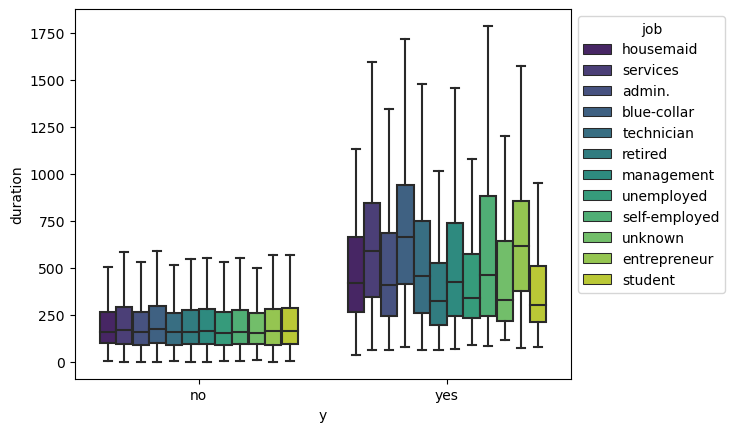

In [14]:
# Boxplot: duration, job and y

ax = sns.boxplot(data=bankdf, x="y", y="duration", hue="job", showfliers=False, palette = "viridis") # ATTENTION not showing outliers
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<Axes: xlabel='marital', ylabel='age'>

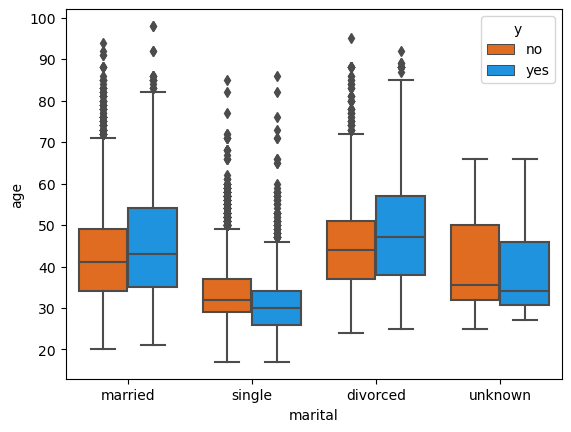

In [15]:
# Boxplot: marital status, age and outcome (y)
sns.boxplot(data=bankdf, x="marital", y="age", hue="y")

In [16]:
# Table of poutcome vs y

tab = pd.crosstab(index=bankdf["poutcome"], 
                            columns=bankdf["y"], margins=True)

tab_per = tab/tab.loc["All","All"]

row = tab_per.index.get_level_values(0)

tab_per.style.background_gradient(
  subset = pd.IndexSlice[row[:-1], 'no'],
  cmap = sns.light_palette("#ff6600", as_cmap = True)).background_gradient(
  subset = pd.IndexSlice[row[:-1], 'yes'],
  cmap = sns.light_palette("#0099ff", as_cmap = True))


y,no,yes,All
poutcome,,,
failure,0.088545,0.014689,0.103234
nonexistent,0.787171,0.076260,0.863431
success,0.011630,0.021705,0.033335
All,0.887346,0.112654,1.000000


In [17]:
tab = pd.crosstab(index=bankdf["education"], 
                            columns=bankdf["y"], margins=True)

tab_per = tab/tab.loc["All",]


row = tab_per.index.get_level_values(0)

tab_per.style.background_gradient(
  subset = pd.IndexSlice[row[:-1], 'no'],
  cmap = sns.light_palette("#ff6600", as_cmap = True)).background_gradient(
  subset = pd.IndexSlice[row[:-1], 'yes'],
  cmap = sns.light_palette("#0099ff", as_cmap = True))

y,no,yes,All
education,,,
basic.4y,0.102550,0.092241,0.101389
basic.6y,0.057568,0.040517,0.055647
basic.9y,0.152457,0.101940,0.146766
high.school,0.232133,0.222198,0.231014
illiterate,0.000383,0.000862,0.000437
professional.course,0.127175,0.128233,0.127294
university.degree,0.287239,0.359914,0.295426
unknown,0.040495,0.054095,0.042027
All,1.000000,1.000000,1.000000


In [18]:
tab = pd.crosstab(index=bankdf["default"], 
                            columns=bankdf["y"], margins=True)

tab_per = tab/tab.loc["All",]


row = tab.index.get_level_values(0)

tab.style.background_gradient(
  subset = pd.IndexSlice[row[:-1], 'no'],
  cmap = sns.light_palette("#ff6600", as_cmap = True)).background_gradient(
  subset = pd.IndexSlice[row[:-1], 'yes'],
  cmap = sns.light_palette("#0099ff", as_cmap = True))

y,no,yes,All
default,,,
no,28391,4197,32588
unknown,8154,443,8597
yes,3,0,3
All,36548,4640,41188


<Axes: xlabel='year', ylabel='count'>

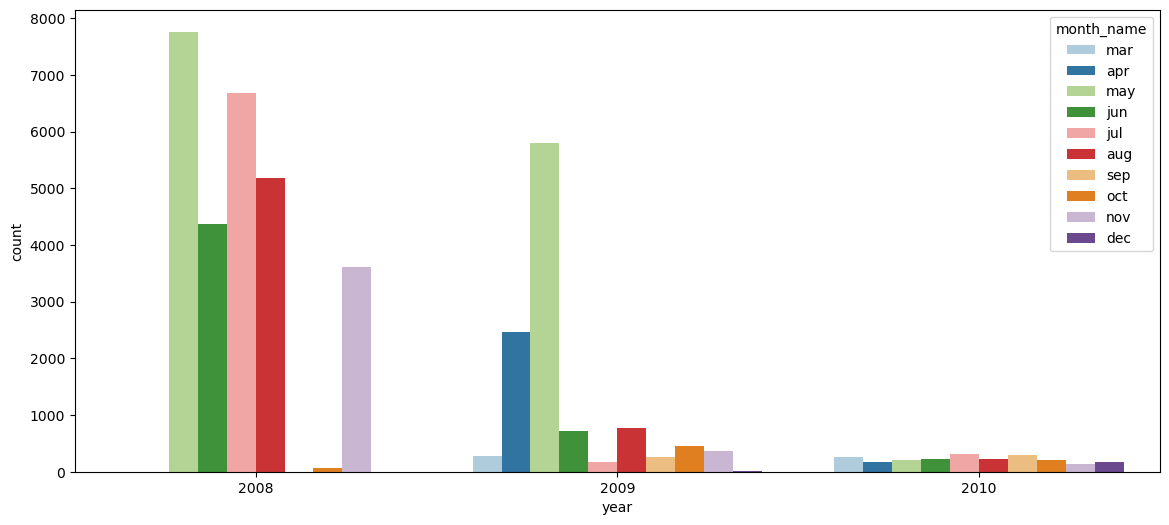

In [19]:
hue_order = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
plt.figure(figsize=(14, 6))
sns.countplot(bankdf, x="year", hue="month_name", hue_order = hue_order, palette= "Paired")

<h1>PRE-PROCESSING</h1>

- Missing Values: no missing values, but some categorical variables have a class called "Unknown". What should be do with it? How many observations having the Unknown class? <br>
- Scaling: is standardization/normalization required? <br>
- Dummy variables: <br>
- Remove duplicate rows <br>
- Feature Engineering: already performed some operations before<br>
- Remove Columns: pdays? does not make sense. Almost everyone was not contacted before. Can remove it. Already know if have been contacted from the poutcome (nonexistent is not contacted).<br>

<h3 style="color:green;">Unknowns Pre-Processing</h3>

In order to preserve interpretability and not lose too many observations, we have decided to remove the Unknowns for the following columns: job, marital, education, housing and loan. 
Furthermore, we decided to keep the Unknown class for the default variables.  

In [8]:
# Unknown count

#bankdf.nunique()
#bankdf.isnull().sum() # no NAs but there are some classes "Unknown", what should we do with them?

for column in bankdf.select_dtypes(include=object):
     print("\n" + column)
     print(bankdf[column].value_counts().to_markdown())
    
# job: 330 
# marital: 80
# education: 1731
# default: 8597
# housing 990
# loan: 990


job
|               |   job |
|:--------------|------:|
| admin.        | 10422 |
| blue-collar   |  9254 |
| technician    |  6743 |
| services      |  3969 |
| management    |  2924 |
| retired       |  1720 |
| entrepreneur  |  1456 |
| self-employed |  1421 |
| housemaid     |  1060 |
| unemployed    |  1014 |
| student       |   875 |
| unknown       |   330 |

marital
|          |   marital |
|:---------|----------:|
| married  |     24928 |
| single   |     11568 |
| divorced |      4612 |
| unknown  |        80 |

education
|                     |   education |
|:--------------------|------------:|
| university.degree   |       12168 |
| high.school         |        9515 |
| basic.9y            |        6045 |
| professional.course |        5243 |
| basic.4y            |        4176 |
| basic.6y            |        2292 |
| unknown             |        1731 |
| illiterate          |          18 |

default
|         |   default |
|:--------|----------:|
| no      |     32588 |


In [9]:
# Dealing with Unknowns: 

bankdf = bankdf[(bankdf['job'] != "unknown") & (bankdf['marital'] != "unknown") & (bankdf['education'] != "unknown")
                 & (bankdf['housing'] != "unknown") & (bankdf['loan'] != "unknown")]


In [10]:
# Dropping the Default variable.... only 3 observations in the "yes" class and too many unknowns. 

bankdf = bankdf.drop(['default'], axis=1)

<h3 style="color:green;">Correlation Pre-Processing</h3>

The social and economic variables are highly-correlated, especially considering emp.var.rate which has some correlations with the other economic variables close to 1.
#We have considered two different approached that could work in this case: (1) dimensionality reduction (for example PCA);(2) dropping the emp.var.rate variable. 

We have decided to go with the second option, since a dimensionality reduction would have been extremely complicated to interpret in the model's results. 

Furthermore, the same problem concerns the two features called: pdays and previous, containing almost the same kind of  information. Additionally, the pdays variable has many values to 999 (indicating no previous calls, that could lead to tricky results in the analysis. Thus, we are dropping the pdays. 

Last, we are dropping year because correlation is too high with the economic and social features (was created starting from those)

In [11]:
# High Correlation:

bankdf = bankdf.drop(['emp.var.rate', 'pdays', 'month_name', 'date', 'day', 'year'], axis=1)

In [12]:
# Remove duplicates: from 38245 to 38232

bankdf = bankdf.drop_duplicates()
len(bankdf)

38232

<h3 style="color:green;">Fairness Pre-Processing (AGE)</h3>

Based on the following paper:
Max Hort and Federica Sarro. 2022. "Privileged and Unprivileged Groups: An Empirical Study on the Impact of the Age Attribute on Fairness." In International Workshop on Equitable Data and Technology (FairWare ’22 ), May 9, 2022, Pittsburgh, PA, USA. ACM, New York, NY, USA, 8 pages.
https://doi.org/10.1145/3524491.3527308

Age threshold used: 47, which minimizes the mean difference (-0.05) between the Young and Old sensitive groups. Metric used is the Demographic Parity Difference. 

In [13]:
# Pre-Processing Fairness. Why is AGE so important in the classification models? Look at feature importance of RF and XGboost, 
# Age is at the very top even if there is no rationale for it to be so high... Could be a sign of unfairness?

# 0 if < 47 (Young), 1  if >=47 (Old)
bankdf['YoungOld'] = np.where(bankdf['age'] < 47, '0', '1')
bankdf['YoungOld'] = bankdf['YoungOld'].astype(str).astype(int)
bankdf = bankdf.drop(['age'], axis=1)

<h3 style="color:green;">Encoding and Dummy reasoning</h3>

Logistic Regression -> dummy trap, need dummy variables dropping first class. Scaling not mandatory but useful (especially for regularization).

KNN -> Feature scaling is extremely important. Dummy variables needed but no dummy trap. 

Tree-based models -> do not need scaling nor dummies. 

In [14]:
# 1 if yes, otherwise 0
bankdf['y'] = np.where(bankdf['y']=='yes', 1, 0)
bankdf['housing'] = np.where(bankdf['housing'] =='yes', 1, 0)
bankdf['loan'] = np.where(bankdf['loan'] =='yes', 1, 0)

<h1>CLASSIFICATION</h1>

Start with: 
- Logistic Regression
- Classification Trees
- KNN

How to improve decision trees (reduce overfitting):
- Random Forests (# features: rule of thumb is max_features=sqrt(n_features))
- XGBoost (learning rate,#trees, max-depth)
- Pruning (both pre and post pruning): max depth, max # leaves, min # points in each node) ->  GRID SEARCH

How to improve logistic regression:
- Lasso regularization
- Ridge regularization
- Discussion about alpha for regularization methods.
- What about changing the threshold? Do we have a preference for FP over FN?

How to improve KNN: 
- think about distance metric used
- k (discuss variance-bias trade-off and decision boundaries meaning)

Feature importance and selection can be done with: 
- Lasso
- Random Forests

In [15]:
# Define X and y
X = bankdf.drop('y', axis=1)
y = bankdf["y"]

# Get dummies for both tree and non tree
X_dummy_nt = pd.get_dummies(X, drop_first = True) # non tree
X_dummy_t = pd.get_dummies(X, drop_first = False) # tree

In [16]:
# Dataset split into test, validation and training set: 20% or 30 test set? Need validation if use CV?

# NON-TREE BASED

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_dummy_nt, y, test_size=0.2, random_state=8) # train and test
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_train_s, y_train_s, test_size=0.2, random_state=8) # train and validation

print("Xtrain_s", X_train_s.shape, "y_train_s", 
      y_train_s.shape, "X_test_s", X_test_s.shape, "X_val_s", X_val_s.shape, "y_val_s", 
      y_val_s.shape, "X_test_s", X_test_s.shape, "y_test_s", y_test_s.shape) 

Xtrain_s (24468, 36) y_train_s (24468,) X_test_s (7647, 36) X_val_s (6117, 36) y_val_s (6117,) X_test_s (7647, 36) y_test_s (7647,)


In [17]:
# TREE BASED

X_train, X_test, y_train, y_test = train_test_split(X_dummy_t, y, test_size=0.2, random_state=8) # train and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=8) # train and validation

print("Xtrain", X_train.shape, "y_train", 
      y_train.shape, "X_test","X_val", X_val.shape, "y_val", 
      y_val.shape, "X_test", X_test.shape, "y_test", y_test.shape) 

Xtrain (24468, 42) y_train (24468,) X_test X_val (6117, 42) y_val (6117,) X_test (7647, 42) y_test (7647,)


In [18]:
# Feature scaling for meaningful numeric variables
numeric = ['month', 'duration', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
other = ['housing', 'loan', 'YoungOld', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'contact_telephone', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success']

scaler = preprocessing.StandardScaler().fit(X_train_s[numeric])

train_idx = X_train_s.index
X_train_standardized = pd.DataFrame(data = scaler.transform(X_train_s[numeric]), columns = numeric)
X_train_standardized = X_train_standardized.set_index(train_idx)

val_idx = X_val_s.index
X_val_standardized = pd.DataFrame(data = scaler.transform(X_val_s[numeric]), columns = numeric)
X_val_standardized = X_val_standardized.set_index(val_idx)

test_idx = X_test_s.index
X_test_standardized = pd.DataFrame(data = scaler.transform(X_test_s[numeric]), columns = numeric)
X_test_standardized = X_test_standardized.set_index(test_idx)

In [19]:
X_train_standardized

,month,duration,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
5093,-0.791279,-0.653157,-0.567636,-0.345202,0.725893,0.906914,0.706423,0.321246
29101,-1.279798,-0.664885,-0.567636,-0.345202,-0.872874,-1.429214,-1.296709,-0.965592
7039,-0.791279,0.844132,-0.567636,-0.345202,0.725893,0.906914,0.708164,0.321246
19208,0.674280,-0.320860,-0.567636,-0.345202,-0.230932,0.972413,0.770254,0.840743
38684,2.139839,-0.512419,-0.206500,3.807406,-1.613978,2.282392,-1.696523,-2.108204
...,...,...,...,...,...,...,...,...
14158,0.185760,0.296820,-0.206500,-0.345202,0.593677,-0.468563,0.767353,0.840743
37508,0.674280,-0.719616,-0.567636,1.731102,-2.393355,1.998563,-1.605419,-1.286252
15867,0.185760,-0.739163,2.321449,-0.345202,0.593677,-0.468563,0.766192,0.840743
9138,-0.302759,-0.035476,-0.206500,-0.345202,1.545282,-0.272066,0.770254,0.840743


In [20]:
# Add back other columns 
X_train_standardized[other] = X_train_s[other]
X_val_standardized[other] = X_val_s[other]
X_test_standardized[other] = X_test_s[other]

<h2 style="color:red;">Logistic Regression</h2>

<h3 style="color:green;">L2 penalty (default, ridge)</h3>

In [50]:
# Logistic Regression, using l2 penalty (Ridge, default)

model_logit = LogisticRegression(random_state = 42, solver = 'liblinear') 
model_logit.fit(X_train_standardized,y_train)

# print score

print("The score of the training set is: ", model_logit.score(X_train_standardized,y_train)) 
print("The score of the validation set is: ", model_logit.score(X_val_standardized,y_val)) 

The score of the training set is:  0.9118849109040379
The score of the validation set is:  0.91106751675658


In [51]:
#print coefficient
coefficient = model_logit.coef_
coefficient

array([[-5.57406681e-02,  1.17536577e+00, -1.08930876e-01,
         1.96937936e-02,  1.62063468e-01,  2.43153066e-01,
        -4.91601904e-01, -5.82509876e-01, -1.27575699e-02,
        -1.16853196e-01,  9.09129152e-02, -3.69333965e-01,
        -1.69492274e-01, -1.62119928e-01, -1.35308563e-01,
         2.49991750e-01,  2.57526633e-02, -3.17925433e-01,
         3.36375122e-01, -4.24503515e-02,  2.38053425e-01,
        -7.75383539e-02,  9.57457521e-02,  1.36262315e-02,
        -1.00589550e-01,  9.22364026e-03,  4.69345259e-01,
         5.95825874e-02,  1.93183917e-01, -6.76112156e-01,
        -1.21155897e-01,  6.27269415e-02,  6.67928742e-04,
         5.95291655e-02,  4.89976003e-01,  1.68805838e+00]])

In [52]:
# odds
odds = np.exp(coefficient)
odds

array([[0.94578438, 3.23932758, 0.89679241, 1.019889  , 1.17593487,
        1.27526381, 0.61164581, 0.55849485, 0.98732346, 0.8897158 ,
        1.09517363, 0.69119454, 0.84409328, 0.85033922, 0.87344636,
        1.28401482, 1.02608713, 0.72765705, 1.39986405, 0.95843805,
        1.26877698, 0.92539153, 1.10047923, 1.01371949, 0.90430413,
        1.00926631, 1.59894695, 1.06139342, 1.21310588, 0.50859047,
        0.88589584, 1.06473606, 1.00066815, 1.06133671, 1.63227705,
        5.40896832]])

<h4 style="color:red;">Interpretation of C in Logistic Regression</h4>

The C parameter in logistic regression controls the inverse of the regularization strength.
This means a smaller value of C specifies stronger regularization, and a larger value specifies weaker regularization. So 0.2 is strong (smaller coefficients), 0.8 is weak.

In [53]:
# Tuning alpha/lambda and choice between Ridge and Lasso regularizaion

# define grid
lr_grid = {
    'penalty': ["l1", "l2"],
    'C':  np.arange(0.1, 1.1, 0.1)
}

# Set up GridSearchCV 
grid_search = GridSearchCV(model_logit, lr_grid, cv=5, n_jobs=-1)

In [ ]:
# Fit the grid search 
grid_search.fit(X_train_standardized, y_train)

# Retrieve and print the scores for each iteration
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Accuracy score for {params}: {mean_score}")

# Retrieve the best hyperparameters and the corresponding best estimator
best = grid_search.best_params_
best_lr_model = grid_search.best_estimator_

    # Print the best hyperparameters
print(f"Best regularization: {best}")
# Best regularization:  {'C': 0.5, 'penalty': 'l1'} -> LASSO WITH ALPHA 0.5

In [ ]:
# Evaluate the best model on the test data
print(f"Validation Accuracy with best model: {best_lr_model.score(X_train_standardized, y_train)}")
print(f"Validation Accuracy with best model: {best_lr_model.score(X_val_standardized, y_val)}")

In [ ]:
coefficient = best_lr_model.coef_

coeff = pd.DataFrame(coefficient)
columns = X_train.columns
coeff.columns = columns
coeff = coeff.transpose(copy=False)
coeff

<h2 style="color:red;">KNN</h2>

If the score gives "AttributeError: 'Flags' object has no attribute 'c_contiguous':
It is a bug in the 1.3.0 version. If you install the 1.2.2 version of scikit-learn it disapears.

pip uninstall scikit-learn <br>
pip install scikit-learn==1.2.2

In [ ]:
# KNN

kn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2) # p is the power parameter for the Minkowski metric (2 Euclidean) 
kn.fit(X_train_standardized,y_train)

print("The score of the training set is: ", kn.score(X_train_standardized,y_train))
print("The score of the validation set is: ", kn.score(X_val_standardized,y_val))

<h3 style="color:green;">How many k? Distance metric? Grid Search</h3>

In [ ]:
# The rule of thumb is sqrt(n)
k = math.ceil(math.sqrt(X_train_standardized.shape[0])) # odd number

In [ ]:
n_neighbors = np.arange(1, k, 2)
accuracy_train =  []
accuracy_val = []

for k in n_neighbors:
    kn_tuning = KNeighborsClassifier(n_neighbors=k) # with Euclidean Distance
    kn_tuning.fit(X_train_standardized,y_train)
    
    accuracy_train.append(kn_tuning.score(X_train_standardized,y_train))
    accuracy_val.append(kn_tuning.score(X_val_standardized,y_val))


In [ ]:
plt.title('Best number of k for KNN')
plt.plot(n_neighbors, accuracy_train, label = 'Train')
plt.plot(n_neighbors, accuracy_val, label = 'Val')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# zoom in

plt.title('Best number of k for KNN')
plt.plot(n_neighbors[0:30], accuracy_train[0:30], label = 'Train')
plt.plot(n_neighbors[0:30], accuracy_val[0:30], label = 'Val')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# maybe 15 or 25?

In [ ]:
d = {'k': n_neighbors[3:30], 'train': accuracy_train[3:30],  'val': accuracy_val[3:30]}
results_df = pd.DataFrame(d)

results_df["diff"] = results_df["train"] - results_df["val"]
results_df

In [ ]:
# Grid Search for both k and distance (p)

kn_grid = {
    'n_neighbors': np.array([15, 25, 33, 37, 41, 45]),
    'p': np.arange(1, 3) # 1 being Manhattan and 2 being Euclidean
}

In [ ]:
# Set up GridSearchCV

grid_search = GridSearchCV(KNeighborsClassifier(), kn_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_standardized, y_train)

# Retrieve and print the scores for each iteration
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Accuracy score for {params}: {mean_score}")


In [ ]:
# Retrieve the best hyperparameters
best_param = grid_search.best_params_
best_param
best_knn_model = grid_search.best_estimator_

    # Print the best hyperparameters
print(f"Best combination of KNN hyperparameters: {best_param}")

# Best combination of KNN hyperparameters: {'n_neighbors': 33, 'p': 2}

In [ ]:
best_knn_model.fit(X_train_standardized,y_train)

print("The score of the training set is: ", best_knn_model.score(X_train_standardized,y_train)) 
print("The score of the validation set is: ", best_knn_model.score(X_val_standardized,y_val)) 

<h2 style="color:red;">Classification Trees</h2>

In [ ]:
# Classification Trees

dtree = tree.DecisionTreeClassifier(random_state = 42) 
dtree.fit(X_train, y_train) 
print("The score of the training set is: ", dtree.score(X_train, y_train)) # 1.....OVERFITTING
print("The score of the validation set is: ", dtree.score(X_val, y_val))

<h3 style="color:green;">Pre-Pruning: max_depth, min_samples_leaf and min_samples_split</h3>

In [ ]:
# Pruning: max_depth, min_samples_leaf and min_samples_split

y_axis = []
for max_d in range(1,21):
    dtree = tree.DecisionTreeClassifier(max_depth=max_d, random_state=42)
    dtree.fit(X_train, y_train)
    y_axis.append(dtree.score(X_train, y_train))
    print('The Training Accuracy for max_depth {} is:'.format(max_d), dtree.score(X_train, y_train))


In [ ]:
x_axis = range(1,21,1)
y_axis

plt.plot(x_axis, y_axis, marker = 'o')
plt.title("Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
tree_grid = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21,2).tolist(),
              'min_samples_split':np.arange(2,11,2).tolist(),
              'max_leaf_nodes':np.arange(3,26).tolist()}

# create an instance of the grid search object
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), tree_grid, cv=5, n_jobs=-1)

start_time = time.time()
grid_search.fit(X_train, y_train)
duration = time.time() - start_time
# 294.6703038215637 seconds

In [ ]:
# Retrieve and print the scores for each iteration
cv_results = grid_search.cv_results_

# Retrieve the best hyperparameters
best_param = grid_search.best_params_
best__tunedtree_model = grid_search.best_estimator_

    # Print the best hyperparameters
print(f"Best combination of hyperparameters: {best_param}")

# Best combination of hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 20, 'min_samples_split': 2}

In [ ]:
best__tunedtree_model = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 9, max_leaf_nodes= 20,
                                                    min_samples_split= 2, random_state = 42)

best__tunedtree_model.fit(X_train, y_train)

print("The score of the training set is: ", best__tunedtree_model.score(X_train,y_train))
print("The score of the validation set is: ", best__tunedtree_model.score(X_val,y_val)) 

In [ ]:
plt.figure(figsize=(32,8))
tree.plot_tree(best__tunedtree_model,
               feature_names=list(X_train.columns), 
               filled=True, 
               fontsize=10) 

<h3 style="color:green;">Post-Pruning: ccp_alphas</h3>

In [ ]:
# Post-Pruning

# https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

dtree = tree.DecisionTreeClassifier(random_state=42) 
path = dtree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

# The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree with one node.

In [ ]:
clfs = [] #building the different decision trees for each ccp_alpha
for ccp_alpha in ccp_alphas:
    dtree = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dtree.fit(X_train, y_train)
    clfs.append(dtree)

# Number of nodes in the last tree is: 1 

In [ ]:
train_scores =[]
val_scores =[]

for tree in clfs: 
    train_scores.append(tree.score(X_train, y_train))
    val_scores.append(tree.score(X_val, y_val))
    
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="val", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# zoom in of previous plot

#len(ccp_alphas)

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas[710:-20], train_scores[710:-20],marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[710:-20], val_scores[710:-20], marker="o",label="val", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
d = {'ccp_alpha':ccp_alphas[710:-20], 'train': train_scores[710:-20],  'val': val_scores[710:-20]}
results_df = pd.DataFrame(d)
results_df

In [ ]:
# Best ccp_alpha: 0.000161
best_ccp_alpha = float(0.000161)
from sklearn import tree
best_posttree_model = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)

best_posttree_model.fit(X_train, y_train) 
print("The score of the training set is: ", best_posttree_model.score(X_train, y_train))
print("The score of the validation set is: ", best_posttree_model.score(X_val, y_val))


In [ ]:
plt.figure(figsize=(60,15))
tree.plot_tree(best_posttree_model,
               feature_names=list(X_train.columns), 
               filled=True, 
               fontsize=10) 

<h2 style="color:red;">Ensamble Methods</h2>

<h3 style="color:green;">Random Forests</h3>

In [ ]:
# Random Forests
rf = RandomForestClassifier(random_state = 42) # everything default

rf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train))) # 1.... OVERFITTING!!!
print("Accuracy on validation set: {:.3f}".format(rf.score(X_val, y_val)))

Parameters to tune: 

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node

In [ ]:
# Tuning parameters: CHECK THE GRID.... IS IT REASONABLE??????

param_grid = {
    'max_depth': np.arange(10, 100, 10),
    'max_features': np.arange(2,30,2),
    'min_samples_leaf': np.arange(5,30,5),
    'min_samples_split': np.arange(2,20,2),
    'n_estimators': np.arange(10,400,10)
}

In [ ]:
# RANDOM SEARCH (not GRID... too computationally expensive with RF....)

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(RandomForestClassifier(random_state = 42), param_grid, cv=5, n_jobs=-1, random_state=42)

start_time = time.time()
random_search.fit(X_train, y_train)
duration = time.time() - start_time

In [ ]:
# Retrieve and print the scores for each iteration
cv_results = random_search.cv_results_

# Retrieve the best hyperparameters
best_param = random_search.best_params_
best_rf_model = random_search.best_estimator_

    # Print the best hyperparameters
print(f"Best combination of hyperparameters: {best_param}")

#{'n_estimators': 190, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 18, 'max_depth': 60}

In [ ]:
best_rf_model.fit(X_train, y_train)

print("The score of the training set is: ", best_rf_model.score(X_train,y_train))
print("The score of the validation set is: ", best_rf_model.score(X_val,y_val)) 

In [ ]:
feature_importance = best_rf_model.feature_importances_
features= X_train.columns
indices = np.argsort(feature_importance)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')

<h3 style="color:green;">XGBoost</h3>

In [ ]:
# XGBoost
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, # everything default
                                    max_depth=3, random_state=42)


gboost.fit(X_train, y_train) 
print("The score of the training set is: ", gboost.score(X_train, y_train)) 
print("The score of the validation set is: ", gboost.score(X_val, y_val))

In [ ]:
# Tuning the Gradient Boosting parameters

# Choosing max_features < n_features leads to a reduction of variance and an increase in bias.

# BOOSTING PARAMETERS: learning_rate, n_estimators and subsample
# TREE SPECIFIC: using the optimal of decision trees ('gini', 'max_depth': 7, 'max_leaf_nodes': 25, 'min_samples_split': 2)


gb_grid = {'n_estimators':range(10,100,10),
             'subsample':[0.6,0.7,0.8,0.9],
             'learning_rate': np.arange(0,1.1,0.1)}

# create an instance of the grid search object
random_search = RandomizedSearchCV(GradientBoostingClassifier(max_depth = 9, max_leaf_nodes = 20, min_samples_split = 2,random_state = 42), 
                           gb_grid, cv=3, n_jobs=-1)

start_time = time.time()
random_search.fit(X_train, y_train)
duration = time.time() - start_time 


In [ ]:
# Retrieve the best hyperparameters
best_param = random_search.best_params_
best_gboost = random_search.best_estimator_

    # Print the best hyperparameters
print(f"Best: {best_param}") 

# Best:  {'learning_rate': 0.7, 'n_estimators': 20, 'subsample': 0.3}

In [ ]:
print("The score of the training set is: ", best_gboost.score(X_train, y_train)) 
print("The score of the validation set is: ", best_gboost.score(X_val, y_val))

In [ ]:
feature_importance = best_gboost.feature_importances_
features= X_train.columns
indices = np.argsort(feature_importance)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')

<h1>EVALUATION</h1>

- Confusion Matrix
- Classification_report (Precision, Accuracy, Recall, F1 Score)
- ROC and AUC
<br><br>

<h4 style="color:red;">
Do we also need:
- Specificity
- Expected value? </h4>


And discussion about the meaning

<b>All the models to evaluate (not including the base models)</b>

- best_lr_model 
- best_knn_model
- best__tunedtree_mode
- best_posttree_model
- best_rf_model
- best_gboost

In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression with regularization
best_lr_model = LogisticRegression(C = 0.5, penalty = 'l1', random_state = 42, solver = 'liblinear')

# KNN
best_knn_model = KNeighborsClassifier(n_neighbors=33, weights='uniform', p=2)

# Decision Trees
best__tunedtree_model = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 9, max_leaf_nodes= 20, min_samples_split= 2, random_state = 42)
best_posttree_model = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=float(0.000161))

# Ensable Trees
best_rf_model = RandomForestClassifier(n_estimators = 190, min_samples_split = 6, min_samples_leaf = 10, max_features = 18, max_depth = 60, random_state = 42) 
best_gboost = GradientBoostingClassifier(n_estimators=20, learning_rate=0.7, max_depth=9, subsample =  0.7, min_samples_split = 2, max_leaf_nodes = 20, random_state=42)


# Saving all the models in a list and fit each one with a for loop:
models = [best_lr_model, best_knn_model, best__tunedtree_model, best_posttree_model, best_rf_model, best_gboost]

# Non-tree models:
for m in models[0:2]: 
    m.fit(X_train_standardized, y_train)

# Tree-based models
for m in models[2:]:
    m.fit(X_train, y_train)

<h3 style="color:green;">Dummy Classifier</h3>

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_standardized, y_train)


dummy_pred=dummy_clf.predict(X_test_standardized)
cm_dummy = confusion_matrix(y_test, dummy_pred)

# Print Confusion Matrix
print(cm_dummy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dummy,
                               display_labels=dummy_clf.classes_)
disp.plot()
plt.show()

# Print Classification Report
print(classification_report(y_test, dummy_pred))

# ROC and AUC
y_prob_dummy = dummy_clf.predict_proba(X_test_standardized)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dummy)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<h3 style="color:green;">Logistic Regression and KNN</h3>

LogisticRegression(C=0.5, penalty='l1', random_state=42, solver='liblinear')
[[6592  177]
 [ 530  348]]


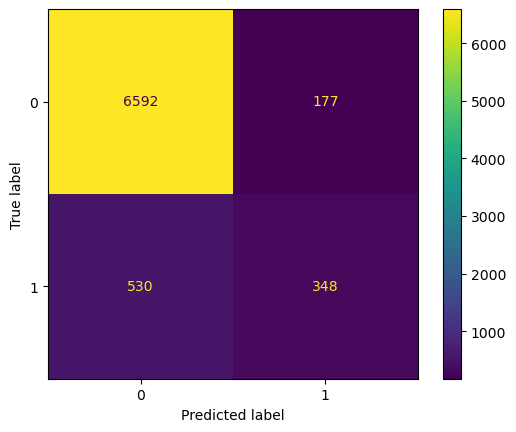

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6769
           1       0.66      0.40      0.50       878

    accuracy                           0.91      7647
   macro avg       0.79      0.69      0.72      7647
weighted avg       0.90      0.91      0.90      7647



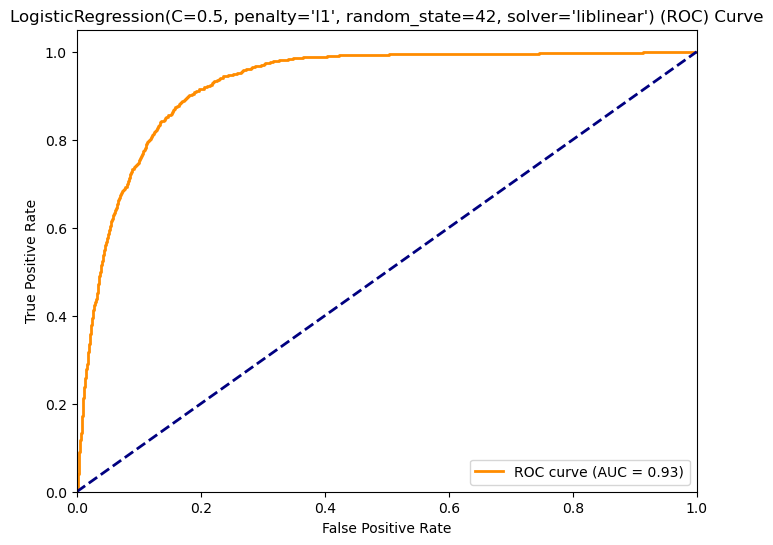

KNeighborsClassifier(n_neighbors=33)
[[6588  181]
 [ 562  316]]


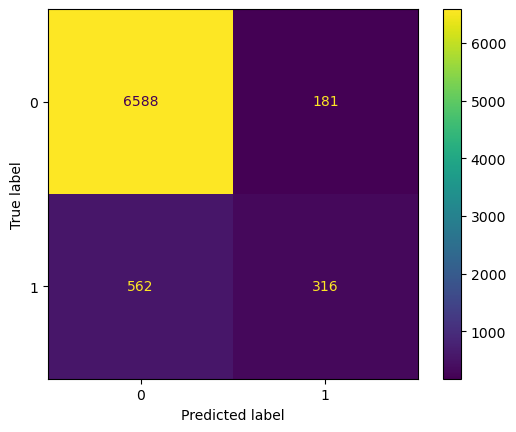

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      6769
           1       0.64      0.36      0.46       878

    accuracy                           0.90      7647
   macro avg       0.78      0.67      0.70      7647
weighted avg       0.89      0.90      0.89      7647



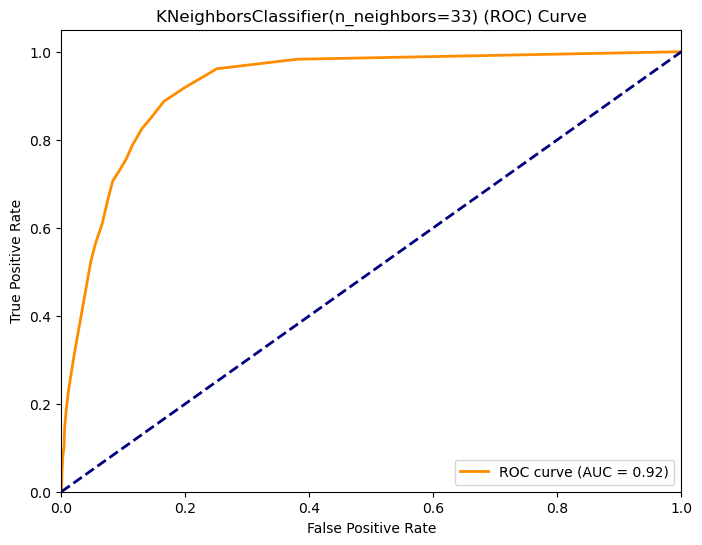

In [22]:
class color:
   GREEN = '\033[92m'
   BOLD = '\033[1m'
   END = '\033[0m'


for m in models[0:2]: 
    pred =m.predict(X_test_standardized)
    cm = confusion_matrix(y_test, pred)

    # Print Confusion Matrix
    print(color.BOLD + color.GREEN + f'{m}' + color.END)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=m.classes_)
    disp.plot()
    plt.show()

    # Print Classification Report
    print(classification_report(y_test, pred))

    # ROC and AUC
    y_prob = m.predict_proba(X_test_standardized)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{m} (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

<h3 style="color:green;">Tree-based Models</h3>

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=20, random_state=42)
[[6484  285]
 [ 389  489]]


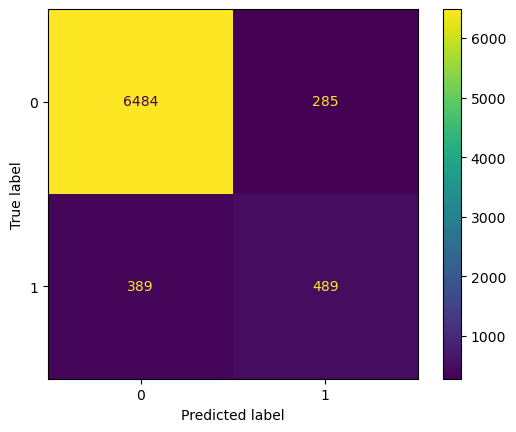

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6769
           1       0.63      0.56      0.59       878

    accuracy                           0.91      7647
   macro avg       0.79      0.76      0.77      7647
weighted avg       0.91      0.91      0.91      7647



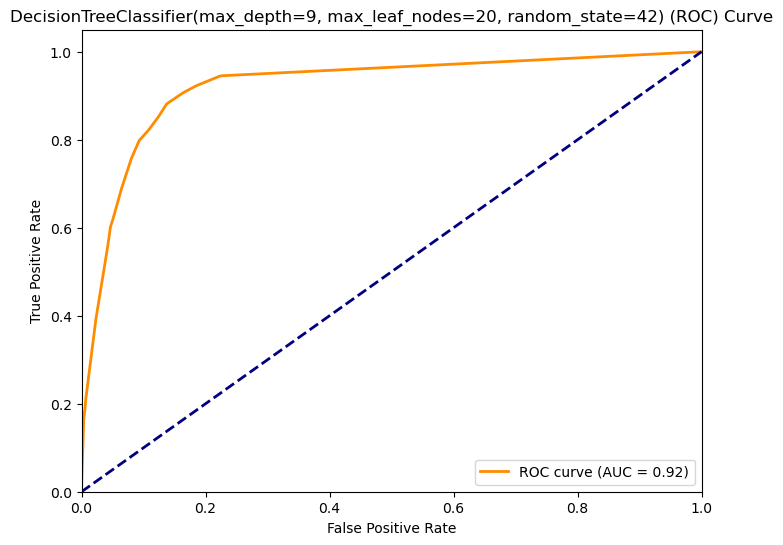

DecisionTreeClassifier(ccp_alpha=0.000161, random_state=42)
[[6523  246]
 [ 414  464]]


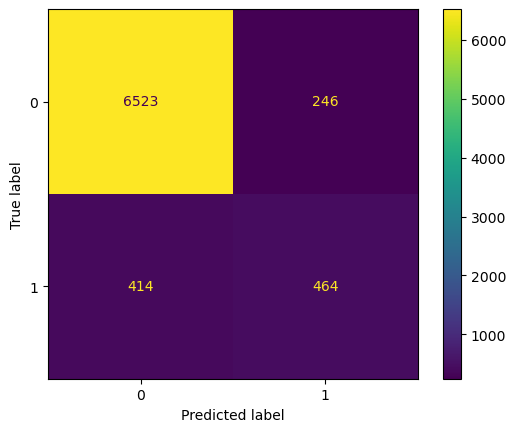

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6769
           1       0.65      0.53      0.58       878

    accuracy                           0.91      7647
   macro avg       0.80      0.75      0.77      7647
weighted avg       0.91      0.91      0.91      7647



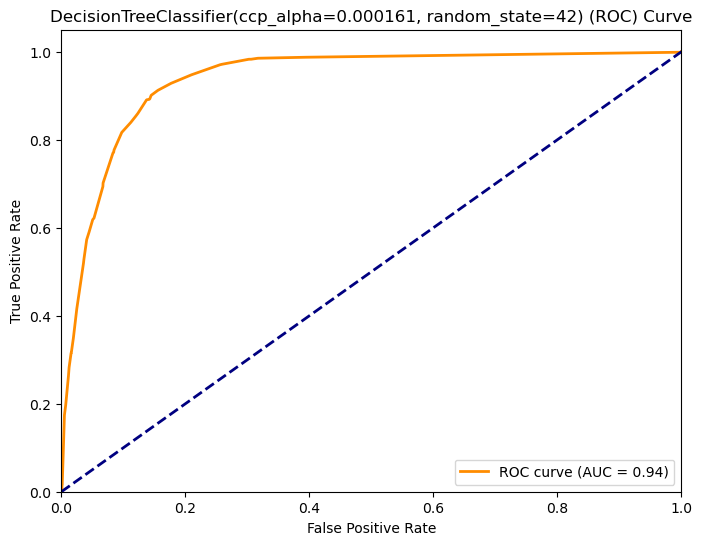

RandomForestClassifier(max_depth=60, max_features=18, min_samples_leaf=10,
                       min_samples_split=6, n_estimators=190, random_state=42)
[[6512  257]
 [ 406  472]]


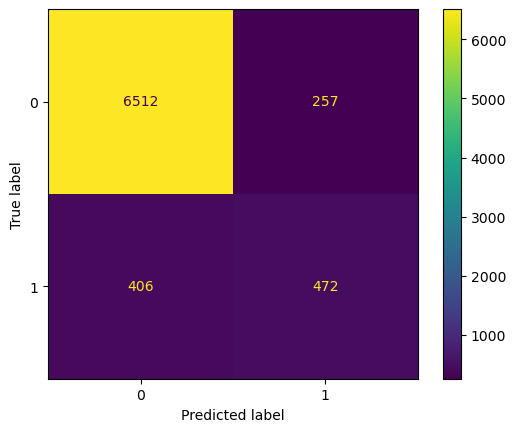

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6769
           1       0.65      0.54      0.59       878

    accuracy                           0.91      7647
   macro avg       0.79      0.75      0.77      7647
weighted avg       0.91      0.91      0.91      7647



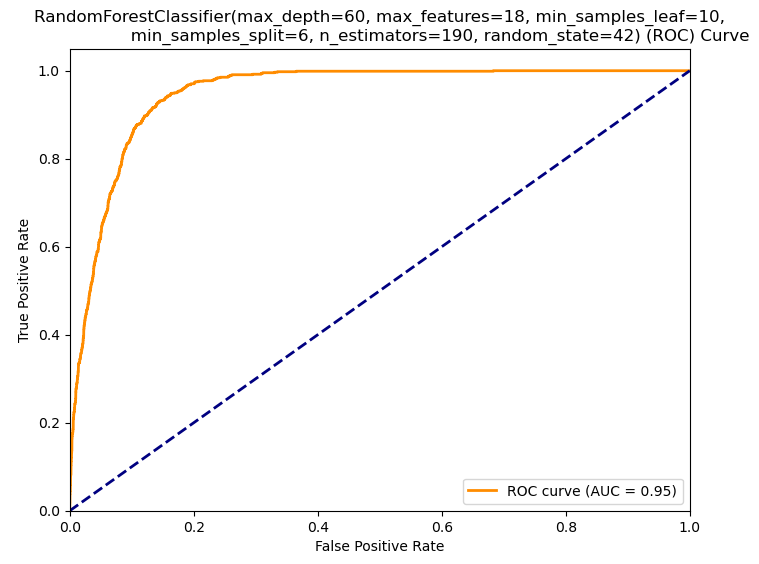

GradientBoostingClassifier(learning_rate=0.7, max_depth=9, max_leaf_nodes=20,
                           n_estimators=20, random_state=42, subsample=0.7)
[[6477  292]
 [ 420  458]]


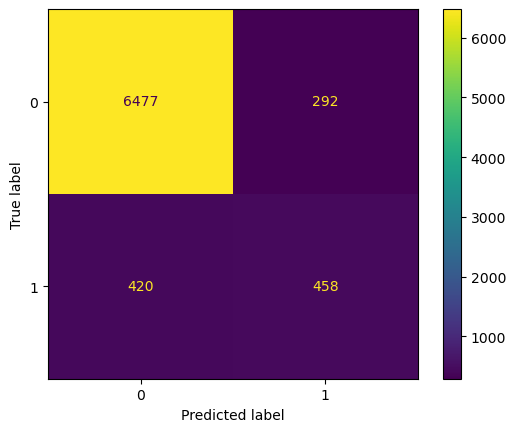

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6769
           1       0.61      0.52      0.56       878

    accuracy                           0.91      7647
   macro avg       0.77      0.74      0.76      7647
weighted avg       0.90      0.91      0.90      7647



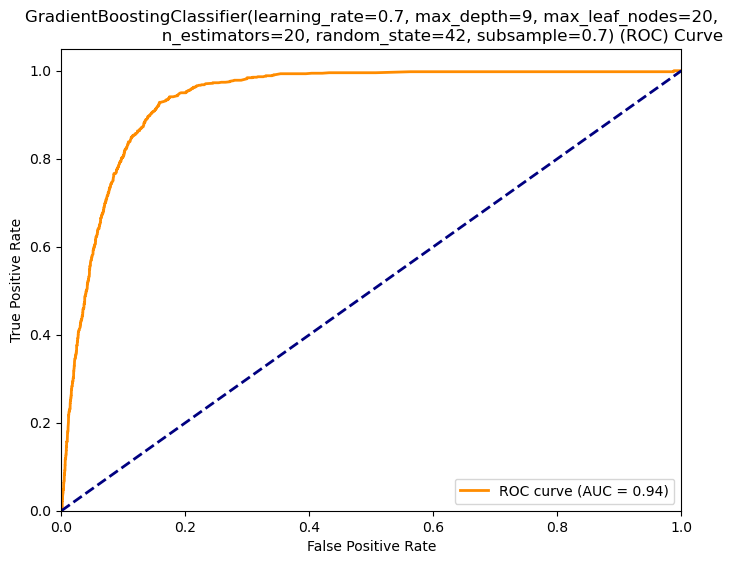

In [23]:
class color:
   GREEN = '\033[92m'
   BOLD = '\033[1m'
   END = '\033[0m'


for m in models[2:]: 
    pred =m.predict(X_test)
    cm = confusion_matrix(y_test, pred)

    # Print Confusion Matrix
    print(color.BOLD + color.GREEN + f'{m}' + color.END)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=m.classes_)
    disp.plot()
    plt.show()

    # Print Classification Report
    print(classification_report(y_test, pred))

    # ROC and AUC
    y_prob = m.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{m} (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

<h1>ETHICS and FAIRNESS</h1>

PRIVACY LIMTATION: This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). <br>

Demographic variables are: age, marital, education, job?

 - demographic parity
 - equality of odds
 
Then
- reduce unfairness


actual features to test:

marital_married X marital_single X marital_divorced ? education_basic.4y ? education_basic.6y X education_basic.9y X education_high.school X education_illiterate X education_professional.course X education_university.degree X housing_yes X housing_no ? job_admin. ? job_blue-collar job_entrepreneur job_housemaid job_management job_retired job_self-employed job_services job_student job_technician job_unemployed

In [24]:
index = X_test.index
columns = X_test.columns

<h2 style="color:red;">ROC Curve of marital status' sensitive groups </h2>

This is a post-processing way to mitigate unfariness. Next step is defining the threshold for which unfairness is 
reduced.

In [25]:
# SENSITIVE GROUPS FOR MARITAL STATUS: married, single and divorced

a1_test = X_test[X_test['marital_married'] == 1]
a2_test = X_test[X_test['marital_single'] == 1]
a3_test = X_test[X_test['marital_divorced'] == 1]

In [26]:
# actual y of each group, keeping the right index 
i1 = a1_test.index
a1_y = y_test.filter(items = i1, axis=0)
i2 = a2_test.index
a2_y = y_test.filter(items = i2, axis=0)
i3 = a3_test.index
a3_y = y_test.filter(items = i3, axis=0)

# predictions for each group
a1_pred=best_rf_model.predict(a1_test)
a2_pred=best_rf_model.predict(a2_test)
a3_pred=best_rf_model.predict(a3_test)

In [27]:
# ROC AND AUC. Retrieving the fpr, tpr and thresholds for each sensitive group.

a1_prob = best_rf_model.predict_proba(a1_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(a1_y, a1_prob)
roc_auc_1 = auc(fpr1, tpr1)

a2_prob = best_rf_model.predict_proba(a2_test)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(a2_y, a2_prob)
roc_auc_2 = auc(fpr2, tpr2)

a3_prob = best_rf_model.predict_proba(a3_test)[:,1]
fpr3, tpr3, thresholds3 = roc_curve(a3_y, a3_prob)
roc_auc_3 = auc(fpr3, tpr3)

In [28]:
# Retrieve the threshold that minimize unfariness (intersection of 3 curves)

roc = pd.DataFrame({'fpr1' : fpr1, 'tpr1' : tpr1, 'thresholds' : thresholds1})
roc = roc[(roc['fpr1'] >= 0.25) & (roc['fpr1'] < 0.3)]
roc

# threshold: 0.016029

,fpr1,tpr1,thresholds
465,0.264312,0.985830,0.016357
466,0.264312,0.987854,0.016346
467,0.276248,0.987854,0.013482
468,0.276248,0.989879,0.013472
469,0.279903,0.989879,0.012794
470,0.279903,0.991903,0.012770
471,0.297686,0.991903,0.010035
472,0.297686,0.993927,0.010013


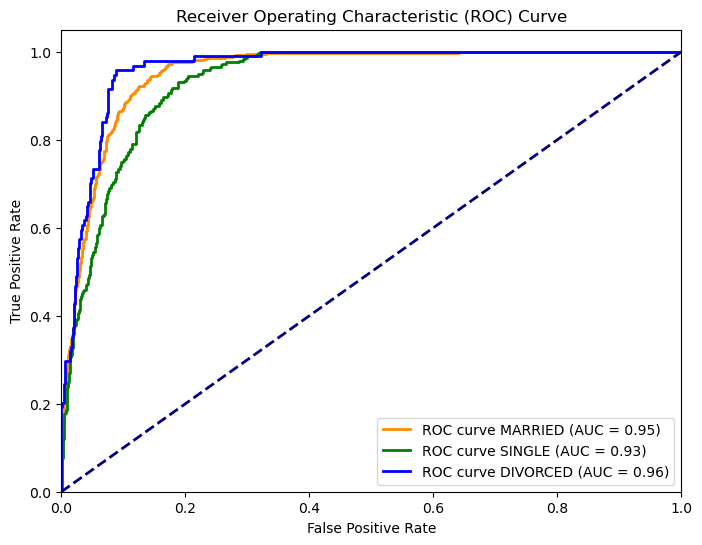

In [29]:
# add lines to the plot for each sensitive group (married, single and divorced)

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve MARRIED (AUC = %0.2f)' % roc_auc_1)
plt.plot(fpr2, tpr2, color='g', lw=2, label='ROC curve SINGLE (AUC = %0.2f)' % roc_auc_2)
plt.plot(fpr3, tpr3, color='b', lw=2, label='ROC curve DIVORCED (AUC = %0.2f)' % roc_auc_3)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Which threshold should we pick for the classification and minimization of unfariness?
Maybe 0.016029

<h2 style="color:red;">Fairness Assessment: Age </h2>

In [30]:
# for fairness assessment

from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate, selection_rate, equalized_odds_difference, demographic_parity_difference, selection_rate

# for mitigation
from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer

In [31]:
# create a MetricFrame to compute metrics across groups

pred = best_rf_model.predict(X_test)

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred= pred,
    sensitive_features=X_test['YoungOld'])

# Print the results
print(metrics.by_group)

          selection_rate       TPR       FPR
YoungOld                                    
0               0.089802  0.528830  0.037147
1               0.111167  0.557196  0.040398


In [32]:
# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, pred, sensitive_features=X_test['YoungOld'])
print(f"Demographic Parity Difference: {dpd:.2f}")

Demographic Parity Difference: 0.02


In [33]:
# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, pred, sensitive_features=X_test['YoungOld'])
print(f"Equalized Odds Difference: {eod:.2f}")

Equalized Odds Difference: 0.03


<h3 style="color:green;">Mitigating Unfairness</h3>

In [35]:
# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

postprocessor.fit(X_test, y_test,  sensitive_features=X_test['YoungOld'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test['YoungOld'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test['YoungOld'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test['YoungOld'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test['YoungOld'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

Best RF Model:
Equalized Odds Difference after Mitigation: 0.01
          selection_rate       TPR       FPR
YoungOld                                    
0               0.096507  0.568369  0.039913
1               0.115210  0.575646  0.042155
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6769
           1       0.65      0.56      0.61       878

    accuracy                           0.92      7647
   macro avg       0.80      0.76      0.78      7647
weighted avg       0.91      0.92      0.91      7647



<h2 style="color:red;">Fairness Assessment: Marital Status </h2>
marital_married X marital_single X marital_divorced

In [39]:
class color:
   GREEN = '\033[92m'
   BOLD = '\033[1m'
   END = '\033[0m'

cl = ['marital_married', 'marital_single', 'marital_divorced']


for c in cl: 
    print(color.BOLD + color.GREEN + f'{c}' + color.END)
    metrics = MetricFrame(metrics={
        'selection_rate': selection_rate,
        'TPR': true_positive_rate, 
        'FPR': false_positive_rate},
        y_true=y_test,y_pred=pred,
        sensitive_features=X_test[c])

    # Print the results
    print(metrics.by_group)

    # Compute the demographic parity difference
    dpd = demographic_parity_difference(y_test, pred, sensitive_features=X_test[c])
    print(f"Demographic Parity Difference: {dpd:.2f}")

    # Compute the equalized odds difference
    eod = equalized_odds_difference(y_test, pred, sensitive_features=X_test[c])
    print(f"Equalized Odds Difference: {eod:.2f}")

marital_married
                 selection_rate       TPR       FPR
marital_married                                    
0                      0.109580  0.544271  0.046922
1                      0.085888  0.532389  0.032156
Demographic Parity Difference: 0.02
Equalized Odds Difference: 0.01
marital_single
                selection_rate       TPR       FPR
marital_single                                    
0                     0.083878  0.525510  0.031098
1                     0.124825  0.562069  0.056247
Demographic Parity Difference: 0.04
Equalized Odds Difference: 0.04
marital_divorced
                  selection_rate       TPR       FPR
marital_divorced                                    
0                       0.098249  0.543367  0.039637
1                       0.073707  0.489362  0.025767
Demographic Parity Difference: 0.02
Equalized Odds Difference: 0.05


<h3 style="color:green;">Mitigating Unfairness</h3>

In [42]:
print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

for c in cl:
    print(color.BOLD + color.GREEN + f'{c}' + color.END)
    postprocessor.fit(X_test, y_test,  sensitive_features=X_test[c])

    best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test[c])

    # re-assess the equality of odds
    eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test[c])
    print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

    # re-assess the metric frame
    metrics = MetricFrame(metrics={
        'selection_rate': selection_rate,
        'TPR': true_positive_rate, 
        'FPR': false_positive_rate},
        y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
        sensitive_features=X_test[c])

    # Print the results
    print(metrics.by_group)

    # Use the postprocessed model to make predictions on the test set
    best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test[c])

    # Print the classification report
    print(classification_report(y_test, best_rf_model_y_pred_mitigated))


Best RF Model:
marital_married
Equalized Odds Difference after Mitigation: 0.01
                 selection_rate       TPR       FPR
marital_married                                    
0                      0.075131  0.416667  0.025901
1                      0.067841  0.423077  0.025091
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6769
           1       0.68      0.42      0.52       878

    accuracy                           0.91      7647
   macro avg       0.80      0.70      0.73      7647
weighted avg       0.90      0.91      0.90      7647

marital_single
Equalized Odds Difference after Mitigation: 0.01
                selection_rate       TPR       FPR
marital_single                                    
0                     0.059187  0.382653  0.020528
1                     0.069191  0.375862  0.021092
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6769
        

<h2 style="color:red;">Fairness Assessment: Education </h2>
education_basic.4y X education_basic.6y X education_basic.9y X education_high.school X education_illiterate X education_professional.course X education_university.degree

In [43]:
cl = ['education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 
      'education_professional.course', 'education_university.degree']

for c in cl: 
    print(color.BOLD + color.GREEN + f'{c}' + color.END)
    metrics = MetricFrame(metrics={
        'selection_rate': selection_rate,
        'TPR': true_positive_rate, 
        'FPR': false_positive_rate},
        y_true=y_test,y_pred=pred,
        sensitive_features=X_test[c])

    # Print the results
    print(metrics.by_group)

    # Compute the demographic parity difference
    dpd = demographic_parity_difference(y_test, pred, sensitive_features=X_test[c])
    print(f"Demographic Parity Difference: {dpd:.2f}")

    # Compute the equalized odds difference
    eod = equalized_odds_difference(y_test, pred, sensitive_features=X_test[c])
    print(f"Equalized Odds Difference: {eod:.2f}")

education_basic.4y
                    selection_rate       TPR       FPR
education_basic.4y                                    
0                         0.094836  0.531407  0.037671
1                         0.099741  0.597561  0.040580
Demographic Parity Difference: 0.00
Equalized Odds Difference: 0.07
education_basic.6y
                    selection_rate       TPR       FPR
education_basic.6y                                    
0                         0.097449  0.539739  0.038926
1                         0.060046  0.485714  0.022613
Demographic Parity Difference: 0.04
Equalized Odds Difference: 0.05
education_basic.9y
                    selection_rate       TPR       FPR
education_basic.9y                                    
0                         0.100784  0.543367  0.040175
1                         0.064148  0.489362  0.025862
Demographic Parity Difference: 0.04
Equalized Odds Difference: 0.05
education_high.school
                       selection_rate       TPR       FPR

<h3 style="color:green;">Mitigating Unfairness</h3>

In [45]:
for c in cl:
    print(color.BOLD + color.GREEN + f'{c}' + color.END)
    postprocessor.fit(X_test, y_test,  sensitive_features=X_test[c])

    best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test[c])

    # re-assess the equality of odds
    eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test[c])
    print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

    # re-assess the metric frame
    metrics = MetricFrame(metrics={
        'selection_rate': selection_rate,
        'TPR': true_positive_rate, 
        'FPR': false_positive_rate},
        y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
        sensitive_features=X_test[c])

    # Print the results
    print(metrics.by_group)

    # Use the postprocessed model to make predictions on the test set
    best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test[c])

    # Print the classification report
    print(classification_report(y_test, best_rf_model_y_pred_mitigated))

education_basic.4y
Equalized Odds Difference after Mitigation: 0.01
                    selection_rate       TPR       FPR
education_basic.4y                                    
0                         0.099200  0.559045  0.038987
1                         0.093264  0.548780  0.039130
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6769
           1       0.65      0.56      0.60       878

    accuracy                           0.91      7647
   macro avg       0.80      0.76      0.78      7647
weighted avg       0.91      0.91      0.91      7647

education_basic.6y
Equalized Odds Difference after Mitigation: 0.05
                    selection_rate       TPR       FPR
education_basic.6y                                    
0                         0.100915  0.561091  0.040025
1                         0.078522  0.514286  0.040201
              precision    recall  f1-score   support

           0       0.94      0.96      0.9

ValueError: Degenerate labels for sensitive feature value 1

<h2 style="color:red;">Fairness Assessment: Housing </h2>

In [56]:
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=pred,
    sensitive_features=X_test['housing'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, pred, sensitive_features=X_test['housing'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, pred, sensitive_features=X_test['housing'])
print(f"Equalized Odds Difference: {eod:.2f}")

         selection_rate       TPR       FPR
housing                                    
0              0.096311  0.561713  0.037730
1              0.094482  0.517672  0.038174
Demographic Parity Difference: 0.00
Equalized Odds Difference: 0.04


<h3 style="color:green;">Mitigating Unfairness</h3>

In [57]:
postprocessor.fit(X_test, y_test,  sensitive_features=X_test['housing'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test['housing'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test['housing'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test['housing'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test['housing'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

Equalized Odds Difference after Mitigation: 0.01
         selection_rate       TPR       FPR
housing                                    
0              0.070121  0.433249  0.024413
1              0.073486  0.438669  0.024896
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6769
           1       0.69      0.43      0.53       878

    accuracy                           0.91      7647
   macro avg       0.81      0.70      0.74      7647
weighted avg       0.90      0.91      0.90      7647



<h2 style="color:red;">Fairness Assessment: Job </h2>

job_admin. ? job_blue-collar job_entrepreneur job_housemaid job_management job_retired job_self-employed job_services job_student job_technician job_unemployed

In [59]:
cl = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 
'job_services', 'job_student', 'job_technician', 'job_unemployed']

for c in cl: 
    print(color.BOLD + color.GREEN + f'{c}' + color.END)
    metrics = MetricFrame(metrics={
        'selection_rate': selection_rate,
        'TPR': true_positive_rate, 
        'FPR': false_positive_rate},
        y_true=y_test,y_pred=pred,
        sensitive_features=X_test[c])

    # Print the results
    print(metrics.by_group)

    # Compute the demographic parity difference
    dpd = demographic_parity_difference(y_test, pred, sensitive_features=X_test[c])
    print(f"Demographic Parity Difference: {dpd:.2f}")

    # Compute the equalized odds difference
    eod = equalized_odds_difference(y_test, pred, sensitive_features=X_test[c])
    print(f"Equalized Odds Difference: {eod:.2f}")


job_admin.
            selection_rate       TPR       FPR
job_admin.                                    
0                 0.089451  0.530945  0.035214
1                 0.111548  0.553030  0.045737
Demographic Parity Difference: 0.02
Equalized Odds Difference: 0.02
job_blue-collar
                 selection_rate       TPR       FPR
job_blue-collar                                    
0                      0.107417  0.547120  0.043087
1                      0.051776  0.473684  0.020685
Demographic Parity Difference: 0.06
Equalized Odds Difference: 0.07
job_entrepreneur
                  selection_rate       TPR       FPR
job_entrepreneur                                    
0                       0.096526  0.540351  0.038520
1                       0.060000  0.434783  0.022026
Demographic Parity Difference: 0.04
Equalized Odds Difference: 0.11
job_housemaid
               selection_rate     TPR       FPR
job_housemaid                                  
0                    0.094887  0.5

<h3 style="color:green;">Mitigating Unfairness</h3>

In [60]:
for c in cl:
    print(color.BOLD + color.GREEN + f'{c}' + color.END)
    postprocessor.fit(X_test, y_test,  sensitive_features=X_test[c])

    best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test[c])

    # re-assess the equality of odds
    eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test[c])
    print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

    # re-assess the metric frame
    metrics = MetricFrame(metrics={
        'selection_rate': selection_rate,
        'TPR': true_positive_rate, 
        'FPR': false_positive_rate},
        y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
        sensitive_features=X_test[c])

    # Print the results
    print(metrics.by_group)

    # Use the postprocessed model to make predictions on the test set
    best_rf_model_y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test[c])

    # Print the classification report
    print(classification_report(y_test, best_rf_model_y_pred_mitigated))

job_admin.
Equalized Odds Difference after Mitigation: 0.02
            selection_rate       TPR       FPR
job_admin.                                    
0                 0.053457  0.333876  0.019008
1                 0.061425  0.352273  0.018069
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6769
           1       0.72      0.36      0.48       878

    accuracy                           0.91      7647
   macro avg       0.82      0.67      0.72      7647
weighted avg       0.90      0.91      0.90      7647

job_blue-collar
Equalized Odds Difference after Mitigation: 0.05
                 selection_rate       TPR       FPR
job_blue-collar                                    
0                      0.081524  0.448953  0.027767
1                      0.054786  0.403509  0.029089
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6769
           1       0.67      0.45      0.54